In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
events = pd.read_csv(r"C:\Users\NadimintiDeepthi\Desktop\ml\2024-04-12 10_30am.csv")

In [6]:
events

,USER_ID,USER_FULLNAME,USER_USERNAME,USER_PHONENUMBER,USER_EMAIL,USER_DEPARTMENT,USER_ROLE,USER_SKILL,USER_EXPERIENCE,USER_STRENGTH,EVENT_ID,EVENT_TITLE,EVENT_DOMAIN,EVENT_DATE,EVENT_DURATION,EVENT_TRAINER,EVENT_LOCATION,EVENT_DESCRIPTION,EVENT_CAPACITY,EVENT_CURRENTCAPACITY
0,66166583fc13ae7017ab925b,Garreth,geulnm,205-959-8525,gconnerlynm@loc.gov,IT,user,MongoDB,5,2,66167c20e10537e8c57ab3e8,Frontend Frameworks Masterclass,Fullstack,23-04-2024,3,Arv,tardis,Frontend Frameworks Masterclass focuses on mod...,69,39
1,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,66167c20e10537e7c2855baa,Software Testing Techniques Workshop,Fullstack,25-04-2024,1,Neddy,jarvis,Software Testing Techniques Workshop covers so...,50,22
2,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,66167c20e10537e7a3c972f6,Blockchain Development Fundamentals Bootcamp,Blockchain,21-04-2024,1,Neel,groot,Blockchain Development Fundamentals Bootcamp p...,59,30
3,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,66167c20e10537e8a3bcf189,IoT Solutions Workshop,IoT,27-04-2024,5,Barbara,groot,IoT Solutions Workshop explores Internet of Th...,61,33
4,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,66167c20e10537e8928bbf86,Cybersecurity Basics Seminar,Cybersecurity,19-04-2024,5,Aldis,aurum,Cybersecurity Basics Seminar provides foundati...,61,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,66166582fc13ae7017ab9096,Orazio,ogaishsonb1,951-293-3248,omartlandb1@com.com,IT,user,Agile,45,3,66167c20e10537e83e6ca509,DevOps Essentials Workshop,Data,22-04-2024,1,Marlee,jarvis,DevOps Essentials Workshop covers practices fo...,55,34
1001,66166582fc13ae7017ab909b,Bianka,bpennellb6,202-310-1010,bsirkettb6@engadget.com,finance,user,PHP,1,5,66167c20e10537e7714b2053,IoT Security Best Practices Training,IoT,21-04-2024,3,Aaren,groot,IoT Security Best Practices Training focuses o...,54,40
1002,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,66167c20e10537e6dda6cc34,Database Design and Optimization Workshop,Database,20-04-2024,2,Hollis,falcon,Database Design and Optimization Workshop cove...,60,37
1003,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,66167c20e10537e83cb67476,Machine Learning Fundamentals Training,Data,21-04-2024,4,Kit,aurum,Machine Learning Fundamentals Training introdu...,57,39


In [7]:
num_duplicate_rows = events.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 22


In [8]:
events.drop_duplicates(inplace=True)

# Optionally, print the cleaned DataFrame
print(events)

                       USER_ID USER_FULLNAME USER_USERNAME USER_PHONENUMBER  \
0     66166583fc13ae7017ab925b       Garreth        geulnm     205-959-8525   
1     66166582fc13ae7017ab916a         Cammy     cbrahmsgx     900-957-4407   
2     66166582fc13ae7017ab916a         Cammy     cbrahmsgx     900-957-4407   
3     66166582fc13ae7017ab916a         Cammy     cbrahmsgx     900-957-4407   
4     66166582fc13ae7017ab916a         Cammy     cbrahmsgx     900-957-4407   
...                        ...           ...           ...              ...   
1000  66166582fc13ae7017ab9096        Orazio   ogaishsonb1     951-293-3248   
1001  66166582fc13ae7017ab909b        Bianka    bpennellb6     202-310-1010   
1002  66166581fc13ae7017ab8f11     Bridgette     bwherrit8     174-870-6523   
1003  66166581fc13ae7017ab8f11     Bridgette     bwherrit8     174-870-6523   
1004  66166581fc13ae7017ab8f11     Bridgette     bwherrit8     174-870-6523   

                   USER_EMAIL USER_DEPARTMENT USER_

In [9]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 1004
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   USER_ID                983 non-null    object
 1   USER_FULLNAME          983 non-null    object
 2   USER_USERNAME          983 non-null    object
 3   USER_PHONENUMBER       983 non-null    object
 4   USER_EMAIL             983 non-null    object
 5   USER_DEPARTMENT        983 non-null    object
 6   USER_ROLE              983 non-null    object
 7   USER_SKILL             983 non-null    object
 8   USER_EXPERIENCE        983 non-null    int64 
 9   USER_STRENGTH          983 non-null    int64 
 10  EVENT_ID               983 non-null    object
 11  EVENT_TITLE            983 non-null    object
 12  EVENT_DOMAIN           983 non-null    object
 13  EVENT_DATE             983 non-null    object
 14  EVENT_DURATION         983 non-null    int64 
 15  EVENT_TRAINER          983 

In [10]:
null_counts = events.isnull().sum()

print(null_counts)

USER_ID                  0
USER_FULLNAME            0
USER_USERNAME            0
USER_PHONENUMBER         0
USER_EMAIL               0
USER_DEPARTMENT          0
USER_ROLE                0
USER_SKILL               0
USER_EXPERIENCE          0
USER_STRENGTH            0
EVENT_ID                 0
EVENT_TITLE              0
EVENT_DOMAIN             0
EVENT_DATE               0
EVENT_DURATION           0
EVENT_TRAINER            0
EVENT_LOCATION           0
EVENT_DESCRIPTION        0
EVENT_CAPACITY           0
EVENT_CURRENTCAPACITY    0
dtype: int64


***UNIVARIATE ANALYSIS***

Count of Skills:
USER_SKILL
Ruby           67
SQL            64
Git            61
C++            60
MongoDB        55
React          55
Java           55
Agile          52
CSS            49
Node.js        49
Firebase       48
Python         48
Swift          47
Objective-C    45
HTML           45
Kubernetes     41
PHP            41
Angular        37
Docker         33
JavaScript     31
Name: count, dtype: int64



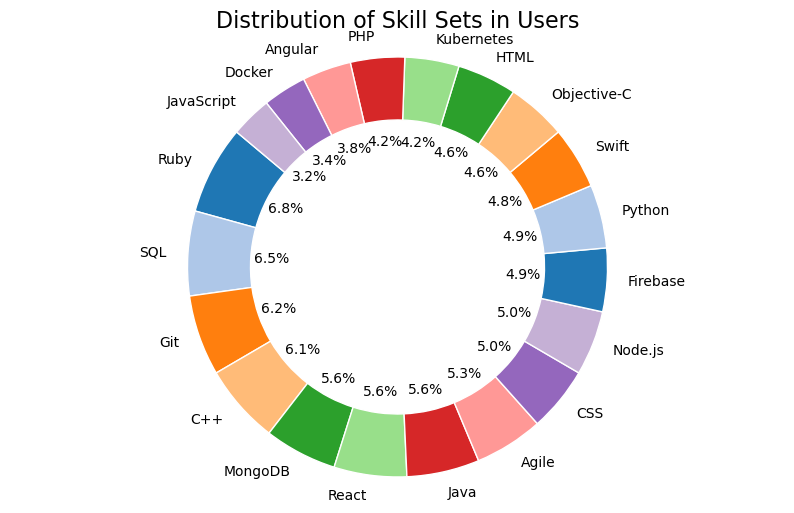

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each skill set
count_skills = events['USER_SKILL'].value_counts()
print("Count of Skills:")
print(count_skills)
print()

# Visualize the Data
plt.figure(figsize=(10, 6))

colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5']

# Create the pie chart
plt.pie(count_skills, 
        labels=count_skills.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        wedgeprops=dict(width=0.3, edgecolor='w'))

# Add title and equal axis for a circular pie
plt.title('Distribution of Skill Sets in Users', fontsize=16)
plt.axis('equal')

# Show the plot
plt.show()


count    983.000000
mean      23.328586
std       12.550301
min        1.000000
25%       13.000000
50%       23.000000
75%       34.000000
max       45.000000
Name: USER_EXPERIENCE, dtype: float64


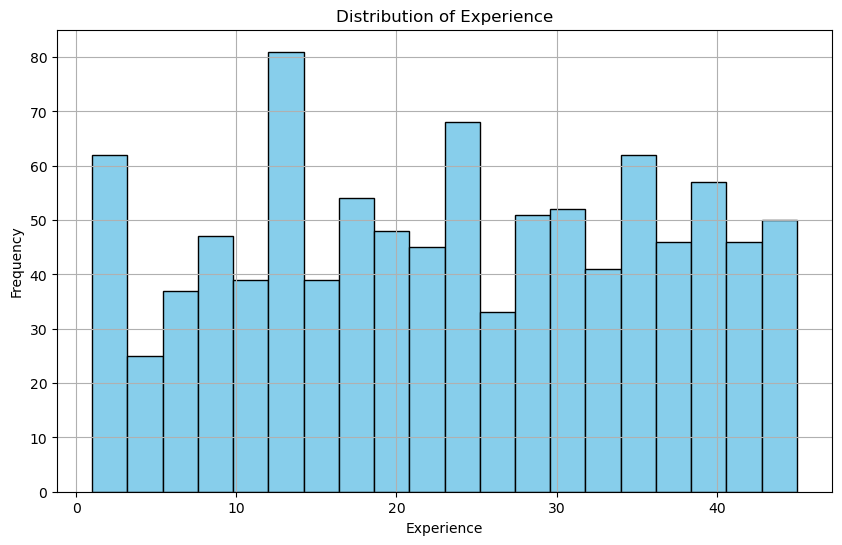

In [21]:
# Descriptive statistics
print(events['USER_EXPERIENCE'].describe())

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(events['USER_EXPERIENCE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Count of Domain:
EVENT_DOMAIN
Fullstack        268
Data             228
Cloud            122
Agile             71
Cybersecurity     68
Blockchain        66
IoT               66
Database          55
Network           39
Name: count, dtype: int64



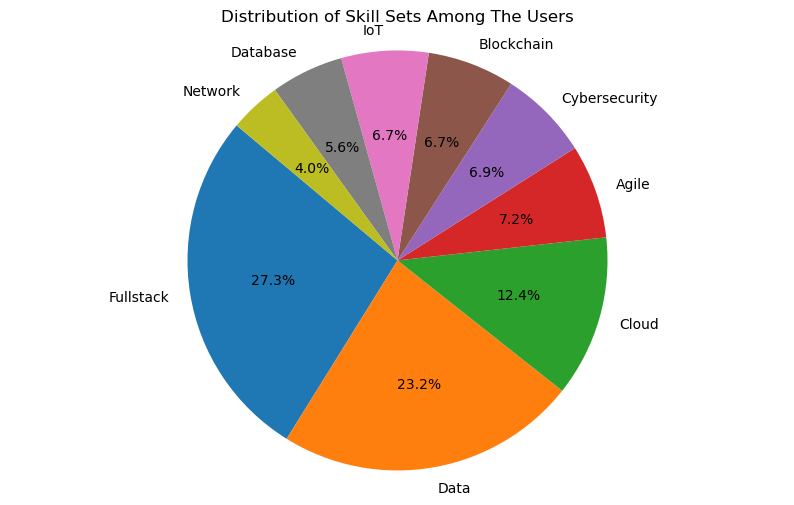

In [24]:
count_domain = events['EVENT_DOMAIN'].value_counts()
print("Count of Domain:")
print(count_domain)
print()

plt.figure(figsize=(10, 6))
plt.pie(count_domain, labels=count_domain.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Skill Sets Among The Users')
plt.axis('equal') 
plt.show()

***BIVARIATE ANALYSIS***

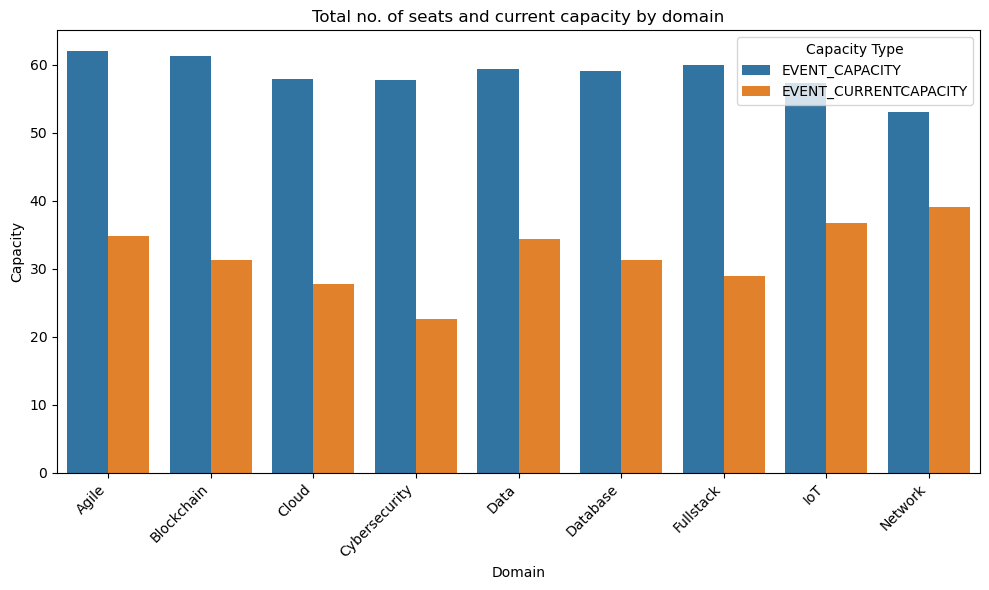

In [26]:
events_pivot = events.groupby('EVENT_DOMAIN').agg({'EVENT_CAPACITY': 'mean', 'EVENT_CURRENTCAPACITY': 'mean'}).reset_index()

events_melted = pd.melt(events_pivot, id_vars=['EVENT_DOMAIN'], value_vars=['EVENT_CAPACITY', 'EVENT_CURRENTCAPACITY'], 
                        var_name='Capacity Type', value_name='Capacity')

plt.figure(figsize=(10, 6))

sns.barplot(data=events_melted, x='EVENT_DOMAIN', y='Capacity', hue='Capacity Type', estimator=np.mean)

plt.title('Total no. of seats and current capacity by domain')
plt.xlabel('Domain')
plt.ylabel('Capacity')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Capacity Type', loc='upper right')
plt.tight_layout()
plt.show()


C:\Users\NadimintiDeepthi\AppData\Local\Temp\ipykernel_14836\3459238620.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  skillset_experience_groups = events.groupby(['USER_SKILL', 'EXPERIENCE_GROUP']).size().unstack(fill_value=0)


<Figure size 5000x1500 with 0 Axes>

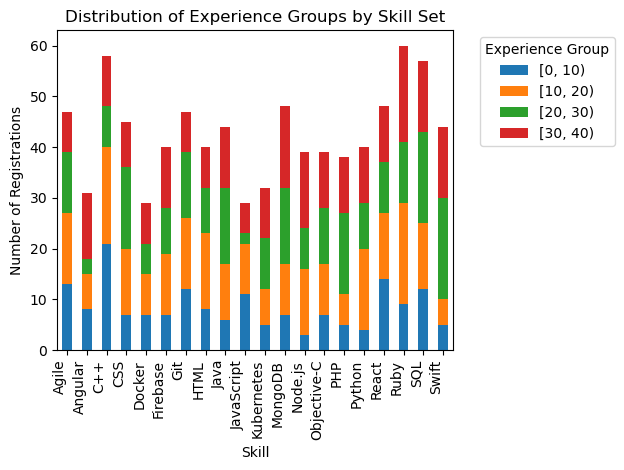

In [34]:
age_groups = np.arange(0, events['USER_EXPERIENCE'].max() + 1, 10)

# Categorize 'EXPERIENCE' into age groups
events['EXPERIENCE_GROUP'] = pd.cut(events['USER_EXPERIENCE'], bins=age_groups, right=False)

# Grouping the DataFrame by 'USER_SKILL' and 'EXPERIENCE_GROUP' and counting the occurrences
skillset_experience_groups = events.groupby(['USER_SKILL', 'EXPERIENCE_GROUP']).size().unstack(fill_value=0)

# Creating the bar plot
plt.figure(figsize=(50, 15))
skillset_experience_groups.plot(kind='bar', stacked=True)
plt.title('Distribution of Experience Groups by Skill Set')
plt.xlabel('Skill')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Experience Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [42]:
num_rows_experience_gt_40 = events[events['USER_EXPERIENCE'] > 40].shape[0]
num_rows_experience_gt_40

96

**FEATURE ENGINEERING**

***FEATURE CREATION***

In [37]:
events['FILLED_CAPACITY'] = (events['EVENT_CAPACITY'] - events['EVENT_CURRENTCAPACITY'])

***FEATURE SELECTION***

In [62]:
unique_trainers = events['USER_DEPARTMENT'].nunique()
print(f"Number of unique trainers: {unique_trainers}")

Number of unique trainers: 4


In [43]:
bins = [0, 10, 20, 30, 40, float('inf')]
labels = [1, 2, 3, 4, 5]

events['EXPERIENCE_GROUP'] = pd.cut(events['USER_EXPERIENCE'], bins=bins, labels=labels, right=False)

In [44]:
events

,USER_ID,USER_FULLNAME,USER_USERNAME,USER_PHONENUMBER,USER_EMAIL,USER_DEPARTMENT,USER_ROLE,USER_SKILL,USER_EXPERIENCE,USER_STRENGTH,...,EVENT_DOMAIN,EVENT_DATE,EVENT_DURATION,EVENT_TRAINER,EVENT_LOCATION,EVENT_DESCRIPTION,EVENT_CAPACITY,EVENT_CURRENTCAPACITY,EXPERIENCE_GROUP,FILLED_CAPACITY
0,66166583fc13ae7017ab925b,Garreth,geulnm,205-959-8525,gconnerlynm@loc.gov,IT,user,MongoDB,5,2,...,Fullstack,2024-04-23,3,Arv,tardis,Frontend Frameworks Masterclass focuses on mod...,69,39,1,30
1,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,Fullstack,2024-04-25,1,Neddy,jarvis,Software Testing Techniques Workshop covers so...,50,22,5,28
2,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,Blockchain,2024-04-21,1,Neel,groot,Blockchain Development Fundamentals Bootcamp p...,59,30,5,29
3,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,IoT,2024-04-27,5,Barbara,groot,IoT Solutions Workshop explores Internet of Th...,61,33,5,28
4,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,Cybersecurity,2024-04-19,5,Aldis,aurum,Cybersecurity Basics Seminar provides foundati...,61,22,5,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,66166582fc13ae7017ab9096,Orazio,ogaishsonb1,951-293-3248,omartlandb1@com.com,IT,user,Agile,45,3,...,Data,2024-04-22,1,Marlee,jarvis,DevOps Essentials Workshop covers practices fo...,55,34,5,21
1001,66166582fc13ae7017ab909b,Bianka,bpennellb6,202-310-1010,bsirkettb6@engadget.com,finance,user,PHP,1,5,...,IoT,2024-04-21,3,Aaren,groot,IoT Security Best Practices Training focuses o...,54,40,1,14
1002,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,...,Database,2024-04-20,2,Hollis,falcon,Database Design and Optimization Workshop cove...,60,37,3,23
1003,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,...,Data,2024-04-21,4,Kit,aurum,Machine Learning Fundamentals Training introdu...,57,39,3,18


In [53]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

events['NEW_TRAINER'] = label_encoder.fit_transform(events['EVENT_TRAINER'].astype(str))
events['NEW_EVENT_TITLE'] = label_encoder.fit_transform(events['EVENT_TITLE'].astype(str))
events['NEW_USER_ROLE'] = label_encoder.fit_transform(events['USER_ROLE'].astype(str))
events['NEW_USER_SKILL'] = label_encoder.fit_transform(events['USER_SKILL'].astype(str))

In [54]:
events

,USER_ID,USER_FULLNAME,USER_USERNAME,USER_PHONENUMBER,USER_EMAIL,USER_DEPARTMENT,USER_ROLE,USER_SKILL,USER_EXPERIENCE,USER_STRENGTH,...,EVENT_CAPACITY,EVENT_CURRENTCAPACITY,EXPERIENCE_GROUP,FILLED_CAPACITY,NEW_TRAINER,NEW_EVENT_TITLE,NEW_USER_ROLE,NEW_USER_SKILL,NEW_USER_EXPERIENCE,NEW_USER_STRENGTH
0,66166583fc13ae7017ab925b,Garreth,geulnm,205-959-8525,gconnerlynm@loc.gov,IT,user,MongoDB,5,2,...,69,39,1,30,3,18,1,11,40,1
1,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,50,22,5,28,24,26,1,7,34,1
2,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,59,30,5,29,25,5,1,7,34,1
3,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,61,33,5,28,4,21,1,7,34,1
4,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,61,22,5,39,1,11,1,7,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,66166582fc13ae7017ab9096,Orazio,ogaishsonb1,951-293-3248,omartlandb1@com.com,IT,user,Agile,45,3,...,55,34,5,21,23,17,1,0,39,2
1001,66166582fc13ae7017ab909b,Bianka,bpennellb6,202-310-1010,bsirkettb6@engadget.com,finance,user,PHP,1,5,...,54,40,1,14,0,20,1,14,0,4
1002,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,...,60,37,3,23,16,16,1,15,15,1
1003,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,...,57,39,3,18,20,22,1,15,15,1


In [57]:
events['NEW_EVENT_DOMAIN'] = label_encoder.fit_transform(events['EVENT_DOMAIN'].astype(str))
events['NEW_EVENT_DATE'] = label_encoder.fit_transform(events['EVENT_DATE'].astype(str))
events['NEW_EVENT_DURATION'] = label_encoder.fit_transform(events['EVENT_DURATION'].astype(str))
events['NEW_FILLED_CAPACITY'] = label_encoder.fit_transform(events['FILLED_CAPACITY'].astype(str))

In [58]:
events

,USER_ID,USER_FULLNAME,USER_USERNAME,USER_PHONENUMBER,USER_EMAIL,USER_DEPARTMENT,USER_ROLE,USER_SKILL,USER_EXPERIENCE,USER_STRENGTH,...,NEW_TRAINER,NEW_EVENT_TITLE,NEW_USER_ROLE,NEW_USER_SKILL,NEW_USER_EXPERIENCE,NEW_USER_STRENGTH,NEW_EVENT_DOMAIN,NEW_EVENT_DATE,NEW_EVENT_DURATION,NEW_FILLED_CAPACITY
0,66166583fc13ae7017ab925b,Garreth,geulnm,205-959-8525,gconnerlynm@loc.gov,IT,user,MongoDB,5,2,...,3,18,1,11,40,1,6,4,2,11
1,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,24,26,1,7,34,1,6,6,0,9
2,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,25,5,1,7,34,1,1,2,0,10
3,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,4,21,1,7,34,1,7,8,4,9
4,66166582fc13ae7017ab916a,Cammy,cbrahmsgx,900-957-4407,cbollivergx@cnn.com,HR,user,HTML,40,2,...,1,11,1,7,34,1,3,0,4,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,66166582fc13ae7017ab9096,Orazio,ogaishsonb1,951-293-3248,omartlandb1@com.com,IT,user,Agile,45,3,...,23,17,1,0,39,2,4,3,0,3
1001,66166582fc13ae7017ab909b,Bianka,bpennellb6,202-310-1010,bsirkettb6@engadget.com,finance,user,PHP,1,5,...,0,20,1,14,0,4,7,2,2,0
1002,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,...,16,16,1,15,15,1,5,1,1,5
1003,66166581fc13ae7017ab8f11,Bridgette,bwherrit8,174-870-6523,bclausen8@narod.ru,Sales,user,Python,23,2,...,20,22,1,15,15,1,4,2,3,1


In [59]:
columns_to_drop = [
    'USER_ID',
    'USER_FULLNAME',
    'USER_USERNAME',
    'USER_PHONENUMBER',
    'USER_EMAIL',
    'EVENT_ID',
    'EVENT_TRAINER',
    'EVENT_LOCATION',
    'EVENT_DESCRIPTION',
    'EVENT_CAPACITY',
    'EVENT_CURRENTCAPACITY'
]

events.drop(columns=columns_to_drop, inplace=True)


In [60]:
events

,USER_DEPARTMENT,USER_ROLE,USER_SKILL,USER_EXPERIENCE,USER_STRENGTH,EVENT_TITLE,EVENT_DOMAIN,EVENT_DATE,EVENT_DURATION,EXPERIENCE_GROUP,...,NEW_TRAINER,NEW_EVENT_TITLE,NEW_USER_ROLE,NEW_USER_SKILL,NEW_USER_EXPERIENCE,NEW_USER_STRENGTH,NEW_EVENT_DOMAIN,NEW_EVENT_DATE,NEW_EVENT_DURATION,NEW_FILLED_CAPACITY
0,IT,user,MongoDB,5,2,Frontend Frameworks Masterclass,Fullstack,2024-04-23,3,1,...,3,18,1,11,40,1,6,4,2,11
1,HR,user,HTML,40,2,Software Testing Techniques Workshop,Fullstack,2024-04-25,1,5,...,24,26,1,7,34,1,6,6,0,9
2,HR,user,HTML,40,2,Blockchain Development Fundamentals Bootcamp,Blockchain,2024-04-21,1,5,...,25,5,1,7,34,1,1,2,0,10
3,HR,user,HTML,40,2,IoT Solutions Workshop,IoT,2024-04-27,5,5,...,4,21,1,7,34,1,7,8,4,9
4,HR,user,HTML,40,2,Cybersecurity Basics Seminar,Cybersecurity,2024-04-19,5,5,...,1,11,1,7,34,1,3,0,4,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,IT,user,Agile,45,3,DevOps Essentials Workshop,Data,2024-04-22,1,5,...,23,17,1,0,39,2,4,3,0,3
1001,finance,user,PHP,1,5,IoT Security Best Practices Training,IoT,2024-04-21,3,1,...,0,20,1,14,0,4,7,2,2,0
1002,Sales,user,Python,23,2,Database Design and Optimization Workshop,Database,2024-04-20,2,3,...,16,16,1,15,15,1,5,1,1,5
1003,Sales,user,Python,23,2,Machine Learning Fundamentals Training,Data,2024-04-21,4,3,...,20,22,1,15,15,1,4,2,3,1


In [ ]:
USER_DEPARTMENT	
# USER_ROLE	
# USER_SKILL	
# USER_EXPERIENCE	
# USER_STRENGTH	
# EVENT_TITLE	
# EVENT_DOMAIN	
# EVENT_DATE	
# EVENT_DURATION	
EXPERIENCE_GROUP
NEW_TRAINER	
NEW_EVENT_TITLE	
NEW_USER_ROLE	
NEW_USER_SKILL	
NEW_USER_EXPERIENCE	
NEW_USER_STRENGTH	
NEW_EVENT_DOMAIN	
NEW_EVENT_DATE	
NEW_EVENT_DURATION	
NEW_FILLED_CAPACITY

In [65]:
events['NEW_USER_DEPARTMENT'] = label_encoder.fit_transform(events['USER_DEPARTMENT'].astype(str))

In [66]:
events


,USER_DEPARTMENT,USER_ROLE,USER_SKILL,USER_EXPERIENCE,USER_STRENGTH,EVENT_TITLE,EVENT_DOMAIN,EVENT_DATE,EVENT_DURATION,EXPERIENCE_GROUP,...,NEW_EVENT_TITLE,NEW_USER_ROLE,NEW_USER_SKILL,NEW_USER_EXPERIENCE,NEW_USER_STRENGTH,NEW_EVENT_DOMAIN,NEW_EVENT_DATE,NEW_EVENT_DURATION,NEW_FILLED_CAPACITY,NEW_USER_DEPARTMENT
0,IT,user,MongoDB,5,2,Frontend Frameworks Masterclass,Fullstack,2024-04-23,3,1,...,18,1,11,40,1,6,4,2,11,1
1,HR,user,HTML,40,2,Software Testing Techniques Workshop,Fullstack,2024-04-25,1,5,...,26,1,7,34,1,6,6,0,9,0
2,HR,user,HTML,40,2,Blockchain Development Fundamentals Bootcamp,Blockchain,2024-04-21,1,5,...,5,1,7,34,1,1,2,0,10,0
3,HR,user,HTML,40,2,IoT Solutions Workshop,IoT,2024-04-27,5,5,...,21,1,7,34,1,7,8,4,9,0
4,HR,user,HTML,40,2,Cybersecurity Basics Seminar,Cybersecurity,2024-04-19,5,5,...,11,1,7,34,1,3,0,4,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,IT,user,Agile,45,3,DevOps Essentials Workshop,Data,2024-04-22,1,5,...,17,1,0,39,2,4,3,0,3,1
1001,finance,user,PHP,1,5,IoT Security Best Practices Training,IoT,2024-04-21,3,1,...,20,1,14,0,4,7,2,2,0,3
1002,Sales,user,Python,23,2,Database Design and Optimization Workshop,Database,2024-04-20,2,3,...,16,1,15,15,1,5,1,1,5,2
1003,Sales,user,Python,23,2,Machine Learning Fundamentals Training,Data,2024-04-21,4,3,...,22,1,15,15,1,4,2,3,1,2


In [67]:
remaining_columns = [
    'USER_DEPARTMENT',
    'USER_ROLE',
    'USER_SKILL',
    'USER_EXPERIENCE',
    'USER_STRENGTH',
    'EVENT_TITLE',
    'EVENT_DOMAIN',
    'EVENT_DATE',
    'EVENT_DURATION'
]


events.drop(columns=remaining_columns, inplace=True)

In [68]:
events

,EXPERIENCE_GROUP,FILLED_CAPACITY,NEW_TRAINER,NEW_EVENT_TITLE,NEW_USER_ROLE,NEW_USER_SKILL,NEW_USER_EXPERIENCE,NEW_USER_STRENGTH,NEW_EVENT_DOMAIN,NEW_EVENT_DATE,NEW_EVENT_DURATION,NEW_FILLED_CAPACITY,NEW_USER_DEPARTMENT
0,1,30,3,18,1,11,40,1,6,4,2,11,1
1,5,28,24,26,1,7,34,1,6,6,0,9,0
2,5,29,25,5,1,7,34,1,1,2,0,10,0
3,5,28,4,21,1,7,34,1,7,8,4,9,0
4,5,39,1,11,1,7,34,1,3,0,4,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,5,21,23,17,1,0,39,2,4,3,0,3,1
1001,1,14,0,20,1,14,0,4,7,2,2,0,3
1002,3,23,16,16,1,15,15,1,5,1,1,5,2
1003,3,18,20,22,1,15,15,1,4,2,3,1,2


In [74]:
print(events.dtypes)


EXPERIENCE_GROUP       int32
FILLED_CAPACITY        int64
NEW_TRAINER            int32
NEW_EVENT_TITLE        int32
NEW_USER_ROLE          int32
NEW_USER_SKILL         int32
NEW_USER_EXPERIENCE    int32
NEW_USER_STRENGTH      int32
NEW_EVENT_DOMAIN       int32
NEW_EVENT_DATE         int32
NEW_EVENT_DURATION     int32
NEW_FILLED_CAPACITY    int32
NEW_USER_DEPARTMENT    int32
dtype: object


In [72]:
events['EXPERIENCE_GROUP'] = label_encoder.fit_transform(events['EXPERIENCE_GROUP'].astype(str))

In [73]:
events

,EXPERIENCE_GROUP,FILLED_CAPACITY,NEW_TRAINER,NEW_EVENT_TITLE,NEW_USER_ROLE,NEW_USER_SKILL,NEW_USER_EXPERIENCE,NEW_USER_STRENGTH,NEW_EVENT_DOMAIN,NEW_EVENT_DATE,NEW_EVENT_DURATION,NEW_FILLED_CAPACITY,NEW_USER_DEPARTMENT
0,0,30,3,18,1,11,40,1,6,4,2,11,1
1,4,28,24,26,1,7,34,1,6,6,0,9,0
2,4,29,25,5,1,7,34,1,1,2,0,10,0
3,4,28,4,21,1,7,34,1,7,8,4,9,0
4,4,39,1,11,1,7,34,1,3,0,4,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,4,21,23,17,1,0,39,2,4,3,0,3,1
1001,0,14,0,20,1,14,0,4,7,2,2,0,3
1002,2,23,16,16,1,15,15,1,5,1,1,5,2
1003,2,18,20,22,1,15,15,1,4,2,3,1,2


In [75]:
# Assuming 'data' is your dataframe containing all the features and the target variable
# 'selected_features' contains the names of features you want to select
selected_features = [
    'EXPERIENCE_GROUP',
    'FILLED_CAPACITY',
    'NEW_TRAINER',
    'NEW_EVENT_TITLE',
    'NEW_USER_ROLE',
    'NEW_USER_SKILL',
    'NEW_USER_EXPERIENCE',
    'NEW_USER_STRENGTH',
    'NEW_EVENT_DOMAIN',
    'NEW_EVENT_DATE',
    'NEW_EVENT_DURATION',
    'NEW_FILLED_CAPACITY',
    'NEW_USER_DEPARTMENT'
]

# Selecting the desired features
selected_data = events[selected_features]

# Separate features (X) and target variable (y)
y = selected_data['NEW_EVENT_TITLE']  # Extract the target variable column
X = selected_data.drop(columns=['NEW_EVENT_TITLE'])  # Drop the target variable column to get features

# Now 'X' contains your feature matrix and 'y' contains your target variable

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X' contains your feature matrix and 'y' contains your target variable
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVM Metrics:
Accuracy: 0.7563451776649747
Precision: 0.7105789103584988
Recall: 0.7563451776649747
F1 Score: 0.7135007235095515
Confusion Matrix:
[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  1  2  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0 

c:\Users\NadimintiDeepthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


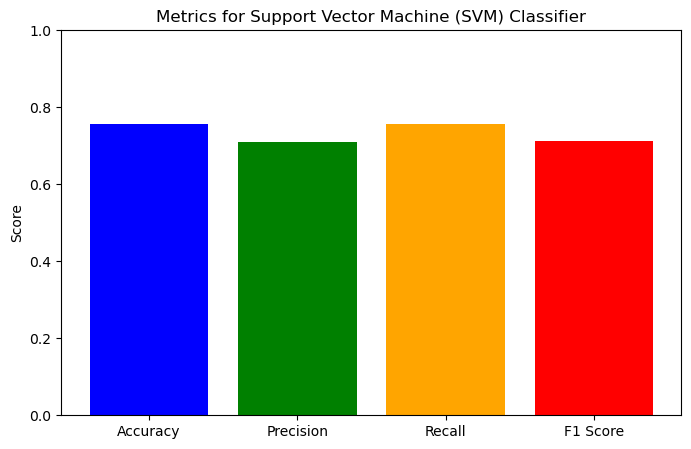

In [79]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined from previous steps

# Training SVM classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Making predictions on the test set
svm_preds = svm_clf.predict(X_test)

# Calculating various metrics
accuracy = accuracy_score(y_test, svm_preds)
precision = precision_score(y_test, svm_preds, average='weighted')
recall = recall_score(y_test, svm_preds, average='weighted')
f1 = f1_score(y_test, svm_preds, average='weighted')
conf_matrix = confusion_matrix(y_test, svm_preds)

# Printing metrics
print("SVM Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Metrics for Support Vector Machine (SVM) Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


c:\Users\NadimintiDeepthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Metrics:
Accuracy: 0.6395939086294417
Precision: 0.6684355929727682
Recall: 0.6395939086294417
F1 Score: 0.5923751543415776
Confusion Matrix:
[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 7 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0

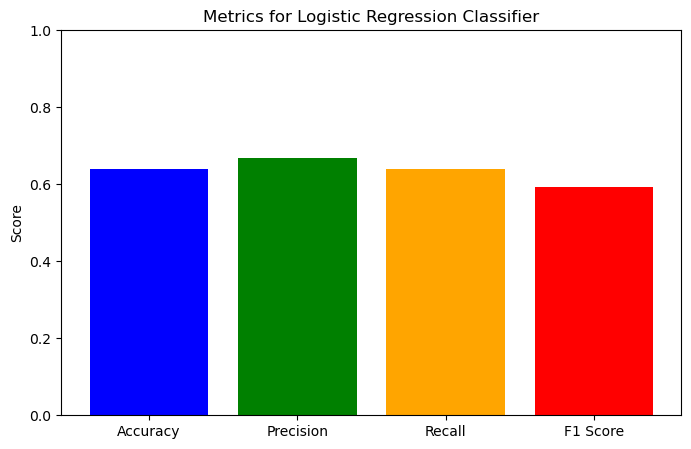

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X', 'y' are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Logistic Regression classifier with regularization
lr_clf = LogisticRegression(max_iter=10000, C=0.01)  # Reduced C for stronger regularization
lr_clf.fit(X_train_scaled, y_train)

# Making predictions on the test set
lr_preds = lr_clf.predict(X_test_scaled)

# Calculating various metrics
accuracy = accuracy_score(y_test, lr_preds)
precision = precision_score(y_test, lr_preds, average='weighted')
recall = recall_score(y_test, lr_preds, average='weighted')
f1 = f1_score(y_test, lr_preds, average='weighted')
conf_matrix = confusion_matrix(y_test, lr_preds)

# Printing metrics
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Metrics for Logistic Regression Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


KNN Metrics:
Accuracy: 0.8223350253807107
Precision: 0.8589068714703233
Recall: 0.8223350253807107
F1 Score: 0.8205014330378779
Confusion Matrix:
[[ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  1  2  0  0  0  0 

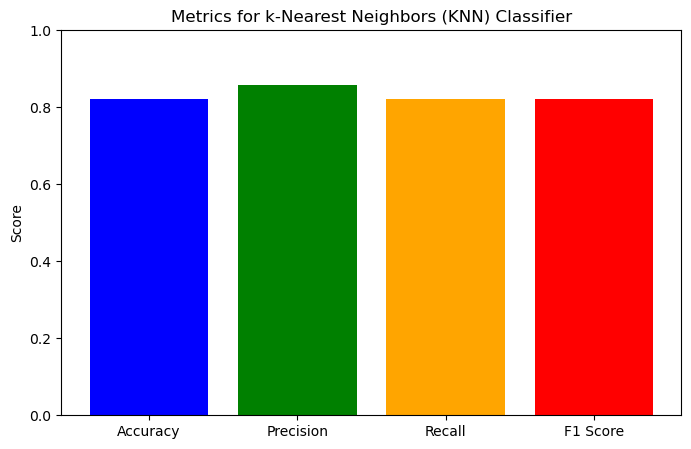

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined from previous steps

# Training KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Making predictions on the test set
knn_preds = knn_clf.predict(X_test)

# Calculating various metrics
accuracy = accuracy_score(y_test, knn_preds)
precision = precision_score(y_test, knn_preds, average='weighted')
recall = recall_score(y_test, knn_preds, average='weighted')
f1 = f1_score(y_test, knn_preds, average='weighted')
conf_matrix = confusion_matrix(y_test, knn_preds)

# Printing metrics
print("KNN Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Metrics for k-Nearest Neighbors (KNN) Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


Decision Tree Metrics:
Accuracy: 0.29441624365482233
Precision: 0.21816293488839303
Recall: 0.29441624365482233
F1 Score: 0.23387396310511327
Confusion Matrix:
[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  3  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  8  0  0]
 [ 0  0  0  

c:\Users\NadimintiDeepthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


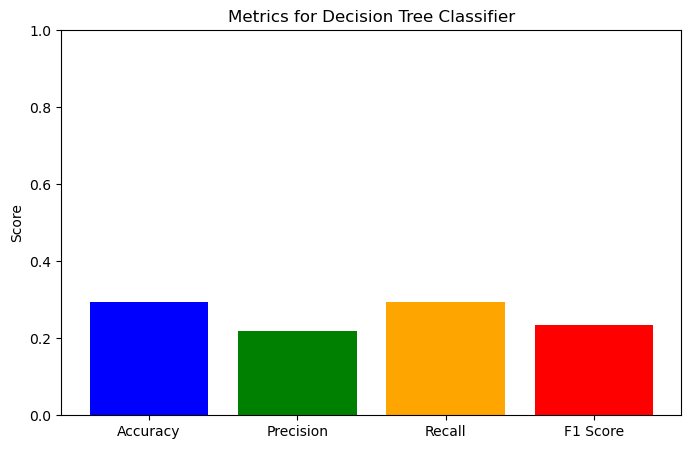

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined from previous steps

# Training Decision Tree classifier with limited max_depth
dt_clf = DecisionTreeClassifier(max_depth=5)  # Limiting the max depth to 5
dt_clf.fit(X_train, y_train)

# Making predictions on the test set
dt_preds = dt_clf.predict(X_test)

# Calculating various metrics
accuracy = accuracy_score(y_test, dt_preds)
precision = precision_score(y_test, dt_preds, average='weighted')
recall = recall_score(y_test, dt_preds, average='weighted')
f1 = f1_score(y_test, dt_preds, average='weighted')
conf_matrix = confusion_matrix(y_test, dt_preds)

# Printing metrics
print("Decision Tree Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Metrics for Decision Tree Classifier')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()
